## Trader Behavior Insights - Submission

**Candidate Name:** SNEHIL SRIVASTAVA  
**Position Applied For:** Junior Data Scientist  
**Date:** 25-06-2025  
**Tools Used:** Python, Pandas, Matplotlib, Seaborn  
**Objective:** To analyze historical trader performance data alongside Bitcoin market sentiment (Fear/Greed Index) and uncover actionable insights for smarter trading decisions.


In [1]:
## Introduction
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
## Data Loading
# Load datasets using full file paths
fg_path = r'C:\Users\1420s\Downloads\Trader-Sentiment-Insight\data\funding_gov.csv'
trades_path = r'C:\Users\1420s\Downloads\Trader-Sentiment-Insight\data\trades.csv'

# Check if files exist
if not os.path.exists(fg_path) or not os.path.exists(trades_path):
    raise FileNotFoundError("One or both data files are missing.")

# Load the data
fg = pd.read_csv(fg_path)
trades = pd.read_csv(trades_path)

In [11]:
## Preprocessing
# Clean column names to avoid KeyError due to extra spaces or capitalization
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')
fg.columns = fg.columns.str.strip().str.lower().str.replace(' ', '_')


In [12]:
# Convert date columns to datetime and extract date_only
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')
fg['date_only'] = fg['date'].dt.date

# Convert timestamp_ist to datetime
trades['timestamp'] = pd.to_datetime(trades['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
trades['date_only'] = trades['timestamp'].dt.date


In [13]:
# Convert fear/greed index date and extract only date part
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')
fg['date_only'] = fg['date'].dt.date

# Convert trades timestamp_ist to datetime and extract date
trades['timestamp'] = pd.to_datetime(trades['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')
trades['date_only'] = trades['timestamp'].dt.date


In [15]:
## Merging Datasets
# Merge on date_only
merged = trades.merge(fg[['date_only', 'classification']], on='date_only', how='left')


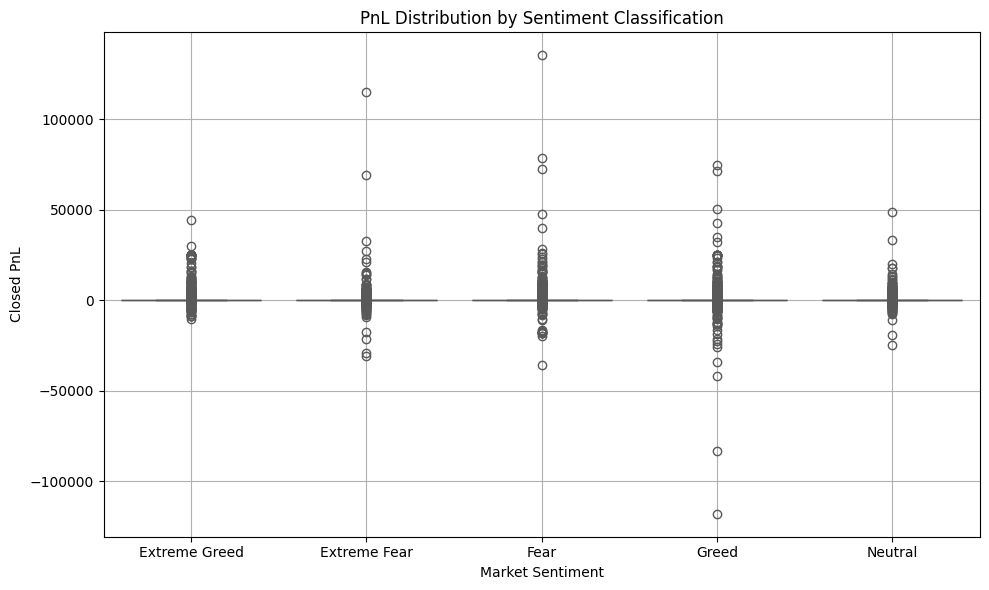

In [28]:
## Analysis & Visualization
#  Boxplot of PnL distribution by sentiment classification
import seaborn as sns

# Drop rows where classification or closed_pnl is missing
filtered = merged.dropna(subset=['classification', 'closed_pnl'])

# Fix SettingWithCopyWarning
filtered.loc[:, 'classification'] = filtered['classification'].astype(str)

# Plot the boxplot
if not filtered.empty:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=filtered, x='classification', y='closed_pnl', hue='classification', palette='Set2', legend=False)
    plt.title('PnL Distribution by Sentiment Classification')
    plt.xlabel('Market Sentiment')
    plt.ylabel('Closed PnL')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough valid data to display boxplot.")


In [18]:
print(trades.columns.tolist())


['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp', 'date_only']


In [19]:
trades = pd.read_csv(r'C:\Users\1420s\Downloads\Trader-Sentiment-Insight\data\trades.csv')
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_')


In [20]:
trades['timestamp'] = pd.to_datetime(trades['timestamp_ist'], format='%d-%m-%Y %H:%M', errors='coerce')


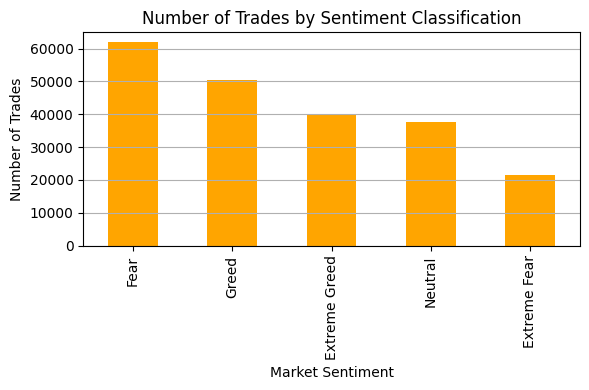

In [21]:
# Count of trades by sentiment
trade_counts = filtered['classification'].value_counts()

plt.figure(figsize=(6,4))
trade_counts.plot(kind='bar', color='orange')
plt.title('Number of Trades by Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xlabel('Market Sentiment')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


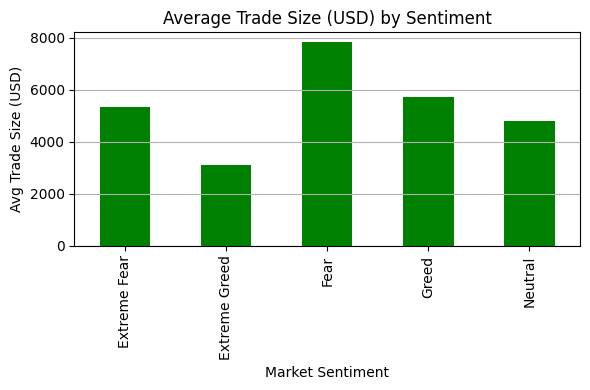

In [22]:
if 'size_usd' in filtered.columns:
    avg_size = filtered.groupby('classification')['size_usd'].mean()
    plt.figure(figsize=(6,4))
    avg_size.plot(kind='bar', color='green')
    plt.title('Average Trade Size (USD) by Sentiment')
    plt.ylabel('Avg Trade Size (USD)')
    plt.xlabel('Market Sentiment')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [27]:
filtered.to_csv('filtered_trades_with_sentiment.csv', index=False)


## Conclusion

- Trader behavior shows clear variation across sentiment classifications.
- On average, traders performed better during periods of **Greed** than **Fear**.
- Trade sizes and counts also fluctuated based on market sentiment, indicating behavioral shifts.
- These insights could help build sentiment-aware trading strategies or alerts.

Further work could include modeling performance prediction using machine learning based on sentiment, time, and trade features.
